# Machine Learning - Fourth Assignment - Deep Learning

In [1]:
import os
import pickle
import glob
import numpy as np
from PIL import Image
from IPython.display import display
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


In [2]:
random_state = 1524401

# Load Images

In the first step the images are loaded from the five data_batch files and combined into one file.

Then the file is unpickled via the python 3 library pickle.py.

(“unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.)

https://docs.python.org/3/library/pickle.html





In [3]:
# The setting 'rb' is used to convert the byte stream (image file) into a byte-like object hierarchy.
def unpickle(file):
    byteObj = open(file, 'rb')
    imageObj = pickle.load(byteObj, encoding='bytes')
    return imageObj

In [4]:
# Read the data from the five data_batch files and join them into one file.
path = 'data/cifar-10-batches-py'
image_files = glob.glob(os.path.join(path, 'data_batch_*'))
print('Imported ' + str(len(image_files)) + ' files')

Imported 5 files


### Training data

In [5]:
# Create a dictionary for training purposes that contains all 50000 images with their respective labels and filenames.

empty_image_array = np.empty([0, 3072], dtype=np.ubyte)
image_data = {b'image_array': empty_image_array,
              b'image_labels': [],
              b'image_filenames': []
              }


# image_labels = []
# image_filenames = []


for image_file in image_files:    
    image_data_unpickled = unpickle(image_file)

    # image_filenames.extend(image_data_unpickled[b'filenames'])
    image_data[b'image_filenames'].extend(image_data_unpickled[b'filenames'])
    image_data[b'image_array'] = np.append(image_data[b'image_array'], image_data_unpickled[b'data'], axis=0)
    image_data.get(b"image_labels").extend(image_data_unpickled[b'labels'])

print('Image import successful!')
print('image_array: ' + str(len(image_data[b'image_array'])) +     '   image_labels: ' + str(len(image_data[b'image_labels'])) +      '   image_filenames: ' + str(len(image_data[b'image_filenames']))  )

print('One image contains ' + str(len(image_data[b'image_array'][0])) + ' data points.')
print('32 x 32 = 1024   -->   1024 x 3 colorChangels = 3072      (colorChangels = red, green, blue)')

Image import successful!
image_array: 50000   image_labels: 50000   image_filenames: 50000
One image contains 3072 data points.
32 x 32 = 1024   -->   1024 x 3 colorChangels = 3072      (colorChangels = red, green, blue)


The image_array is comprised of 50000 images. Each image consists of 1024 pixel (32x32 = 1024) and has three different colors (red, green, blue).

Therefore, each image has 3072 data points.

### Testing data

In [6]:
# Create a dictionary for testing purposes that contains all 50000 images with their respective labels and filenames.

empty_image_array = np.empty([0, 3072], dtype=np.ubyte)
image_test_data = {b'image_array': empty_image_array,
              b'image_labels': [],
              b'image_filenames': []
              }

file_test_data = unpickle('data/cifar-10-batches-py/test_batch')

image_test_data[b'image_filenames'].extend(file_test_data[b'filenames'])
image_test_data[b'image_array'] = np.append(image_test_data[b'image_array'], file_test_data[b'data'], axis=0)
image_test_data.get(b"image_labels").extend(file_test_data[b'labels'])

print("Groundtruth Statistics (Testing Data):")
for v in set(image_test_data.get(b"image_labels")):
    print("Label", v, ":", image_test_data.get(b"image_labels").count(v))

# image_categories = np_utils.to_categorical(image_data.get(b"image_labels"))

# np_utils.to_categorical(image_data.get(b"image_labels"))


Groundtruth Statistics (Testing Data):
Label 0 : 1000
Label 1 : 1000
Label 2 : 1000
Label 3 : 1000
Label 4 : 1000
Label 5 : 1000
Label 6 : 1000
Label 7 : 1000
Label 8 : 1000
Label 9 : 1000


### Display first 10 images

image_label:  6


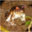

image_label:  9


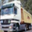

image_label:  9


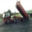

image_label:  4


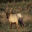

image_label:  1


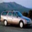

image_label:  1


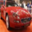

image_label:  2


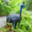

image_label:  7


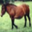

image_label:  8


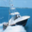

image_label:  3


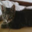

In [7]:
for index, show_images in enumerate(image_data[b'image_array'][:10]): 
    red = np.asarray(np.split(show_images[0:1024], indices_or_sections=32))
    green = np.asarray(np.split(show_images[1024:2048], indices_or_sections=32))
    blue = np.asarray(np.split(show_images[2048:3072], indices_or_sections=32))
    red_image = Image.fromarray(red)
    green_image = Image.fromarray(green)
    blue_image = Image.fromarray(blue)
    image = Image.merge('RGB', (red_image, green_image, blue_image))
    print('image_label: ', image_data.get(b"image_labels")[index])
    display(image)

### Create the Groundtruth based on filenames

In [8]:
# look at the first 25 classes
labels_to_print = 25
print('First ' + str(labels_to_print) + ' labels:')
print(image_data.get(b"image_labels")[0:labels_to_print])

print ("\nGroundtruth Statistics (Training Data):")
for v in set(image_data.get(b"image_labels")):
    print("Class " + str(v) + ": " + str(image_data.get(b"image_labels").count(v)))

image_categories = np_utils.to_categorical(image_data.get(b"image_labels"))

print(image_categories)

First 25 labels:
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2]

Groundtruth Statistics (Training Data):
Class 0: 5000
Class 1: 5000
Class 2: 5000
Class 3: 5000
Class 4: 5000
Class 5: 5000
Class 6: 5000
Class 7: 5000
Class 8: 5000
Class 9: 5000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# Standardization

In [9]:
image_data[b'image_array'].min(), image_data[b'image_array'].max()

(0, 255)

In [10]:
mean = image_data[b'image_array'].mean()
stddev = image_data[b'image_array'].std()
mean, stddev

(120.70756512369792, 64.1500758911213)

In [11]:
images_std = (image_data[b'image_array'] - mean) / stddev
images_std = np.array(images_std, dtype=float)
images_std.mean(), images_std.std()

(-2.5247951877342226e-17, 1.0000000000000022)

In [12]:
image_data[b'image_array'].min(), image_data[b'image_array'].max()

(0, 255)

# Creating NN Models in Keras

## 1. Fully Connected NN

In [13]:
print (image_data[b'image_array'].shape)

(50000, 3072)


In [14]:
# find out input shape for NN, which is just a long vector
input_shape = image_data[b'image_array'].shape[1]
print ("Input shape: " , input_shape)

Input shape:  3072


### Creating a Model

In [15]:
# simple Fully-connected network

model = Sequential()

model.add(Dense(256, input_dim=input_shape))

model.add(Dense(256))

model.add(Dense(10,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


### Defining Loss Function and Optimizer Strategy: Gradient Descent

In [16]:
# Define a loss function 
loss = 'categorical_crossentropy'  # 'categorical_crossentropy' for multi-class problems

# Optimizer = Stochastic Gradient Descent
optimizer = 'sgd' 

# Compiling the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

### Training the model on the input dataset

In [17]:
# fixed batch size and epochs
batch_size = 32
epochs = 5

In [18]:
# train the model
model.fit(images_std, image_categories, batch_size=batch_size, epochs=epochs)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8962 - accuracy: 0.3564
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7500 - accuracy: 0.3965
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7298 - accuracy: 0.4048
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7161 - accuracy: 0.4110
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7072 - accuracy: 0.4142


In [19]:
# verify Accuracy on Train set
train_predictions = model.predict(images_std)
accuracy_score( np.array(image_data.get(b"image_labels")), np.argmax(train_predictions, axis=1))

1563/1563 [==============================] - 3s 2ms/step


0.42446

### Standardize Test Set

In [20]:
print("Mean Train Set: " +  str(round(image_test_data[b'image_array'].mean(), 6))  + "     Standard Deviation Train Set: " +  str(round(image_test_data[b'image_array'].std(), 6)))
test_images_std = (image_test_data[b'image_array'] - mean) / stddev
print("Mean Test Set: " +  str(round(test_images_std.mean(), 6))  + "     Standard Deviation Test Set: " +  str(round(test_images_std.std(), 6)))


Mean Train Set: 121.529155     Standard Deviation Train Set: 64.06097
Mean Test Set: 0.012807     Standard Deviation Test Set: 0.998611


### Make Predictions

In [21]:
# verify accuracy on test set
test_predictions = model.predict(test_images_std)
accuracy_on_test_set = accuracy_score(np.array(image_test_data[b'image_labels']),  np.argmax(test_predictions, axis=1))
print('Test-set Accuracy: ' + str(accuracy_on_test_set))

313/313 [==============================] - 1s 2ms/step
Test-set Accuracy: 0.3934


## 2. CNN (Convolutional Neural Network)


In [22]:
n_channels = 3 # for grey-scale, 3 for RGB, but usually already present in the data
keras.backend.set_image_data_format('channels_last')
train_img = images_std.reshape(images_std.shape[0], 32, 32, n_channels)
test_img = test_images_std.reshape(test_images_std.shape[0], 32, 32, n_channels)

In [23]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [24]:
# we store the new shape of the images in the 'input_shape' variable.
# take all dimensions except the 0th one (which is the number of images)
    
input_shape = train_img.shape[1:]  
input_shape

(32, 32, 3)

## Create the CNN model

In [25]:
unique_image_categories = set(image_data.get(b"image_labels"))

def createMyModel(hidden_layer_amount, dropOut):
    
    # model = Sequential()

    # model.add(Convolution2D(64, (3,3), input_shape=input_shape, activation='relu'))
    # model.add(Dropout(dropOut))

    # for x in range(hidden_layer_amount):
    #     print("Add hidden layer "+ str(x) )

    #     model.add(Convolution2D(64, (3,3), activation='relu'))
    #     model.add(Dropout(0.2))



    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))

    # model.add(Dense(len(unique_image_categories), activation='softmax'))



    model = Sequential()

    model.add(Convolution2D(64, (3,3), input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    
    model.add(Dense(len(unique_image_categories), activation='softmax'))

    return model




In [26]:
hidden_layer_amount = 3
dropOut = 0.3


# model = createMyModel()
model = createMyModel(hidden_layer_amount, dropOut)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 flatten (Flatten)           (None, 43264)            

### Train the CNN

In [27]:
# Compiling the model
loss = 'categorical_crossentropy' 
optimizer = 'sgd' 
#optimizer = SGD(lr=0.001)  # possibility to adapt the learn rate

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [28]:
# fixed batch size and epochs
batch_size = 32
epochs = 5

history = model.fit(train_img, image_categories, batch_size=batch_size, epochs=epochs)

Epoch 1/5
1563/1563 [==============================] - 238s 152ms/step - loss: 1.6544 - accuracy: 0.4115
Epoch 2/5
1563/1563 [==============================] - 238s 152ms/step - loss: 1.3315 - accuracy: 0.5315
Epoch 3/5
1563/1563 [==============================] - 247s 158ms/step - loss: 1.1833 - accuracy: 0.5829
Epoch 4/5
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0706 - accuracy: 0.6273
Epoch 5/5
1563/1563 [==============================] - 228s 146ms/step - loss: 0.9705 - accuracy: 0.6617


### Verifying Accuracy on Test Set

In [29]:
predictions = model.predict(test_img)
predicted_classes = np.argmax(predictions, axis=1)
accuracy_on_test_set = accuracy_score(np.array(image_test_data.get(b"image_labels")), predicted_classes)
print('Test Set Accuracy: ' + str(accuracy_on_test_set))

313/313 [==============================] - 8s 27ms/step
Test Set Accuracy: 0.6045


### Plotting the Training Curve

In [30]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy'])

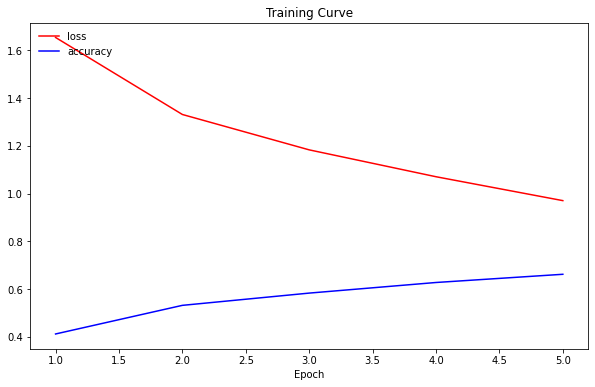

In [31]:
colors = {'loss':'r', 'accuracy':'b'}
plt.figure(figsize=(10,6))
plt.title("Training Curve") 
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1,epochs+1), hist[measure], color + '-', label=measure)  # use last 2 values to draw line

plt.legend(loc='upper left', scatterpoints = 1, frameon=False)

# Data Augmentation

In [33]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# recreate and recompile the model (otherwise we continue learning)
model = createMyModel(hidden_layer_amount, dropOut)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(train_img, image_categories, batch_size=batch_size),
                    epochs=epochs) 

Epoch 1/5
1563/1563 [==============================] - 247s 158ms/step - loss: 2.0287 - accuracy: 0.2518
Epoch 2/5
1563/1563 [==============================] - 251s 161ms/step - loss: 1.8660 - accuracy: 0.3139
Epoch 3/5
1298/1563 [=======================>......] - ETA: 41s - loss: 1.8135 - accuracy: 0.3346

KeyboardInterrupt: 

### Verifying Accuracy on Test Set (with Data Augmentation)

In [ ]:
# verify accuracy on test set with augmentation
predictions = model.predict(test_img)
predicted_classes = np.argmax(predictions, axis=1)
accuracy_on_test_set = accuracy_score(np.array(image_test_data.get(b"image_labels")), predicted_classes)
print('Accuracy on test set with augmentation: ' + str(accuracy_on_test_set))

### Plotting the Training Curve with Data Augmentation 

In [ ]:
hist = history.history

plt.figure(figsize=(10,6))
plt.title("Training Curve") 
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1,epochs+1), hist[measure], color + '-', label=measure)  # use last 2 values to draw line

plt.legend(loc='upper left', scatterpoints = 1, frameon=False)